### Import Essential Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
train = pd.read_csv("/content/DataAir.csv",
                    parse_dates=True, index_col='time')
train.head()
df1=train.drop(train.columns[[0]], axis=1)
df1.head()


,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-2-5,CO,PM-1,O3,Wind Spd,TSP,WinDir1,Temp1,ASKQ,Wind Spd (sai)
time,,,,,,,,,,,,,,,,,,,,,
2019-04-14 07:00:00,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,68.232,78.45,...,7.48,461.82,3.43,-17.17,1.48,31.02,124.553489,26.570572,1004.557967,0.780691
2019-04-14 08:00:00,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,48.492,58.17,...,7.63,595.40,3.43,-3.70,1.55,31.13,134.956598,26.069825,1004.730840,0.779759
2019-04-14 09:00:00,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,30.564,34.38,...,5.31,553.42,2.43,3.09,1.24,21.29,141.069288,26.552454,1004.515630,0.985526
2019-04-14 10:00:00,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,30.996,31.16,...,4.48,446.55,2.14,8.60,1.78,19.24,138.287399,28.677137,1003.877532,1.365120
2019-04-14 11:00:00,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,23.676,28.68,...,3.68,435.10,1.87,33.08,1.56,18.48,137.280406,30.667563,1003.175303,1.724824


### Pre-Processing Data

In [3]:
df=df1
df.head()
#len(df)

,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-2-5,CO,PM-1,O3,Wind Spd,TSP,WinDir1,Temp1,ASKQ,Wind Spd (sai)
time,,,,,,,,,,,,,,,,,,,,,
2019-04-14 07:00:00,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,68.232,78.45,...,7.48,461.82,3.43,-17.17,1.48,31.02,124.553489,26.570572,1004.557967,0.780691
2019-04-14 08:00:00,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,48.492,58.17,...,7.63,595.40,3.43,-3.70,1.55,31.13,134.956598,26.069825,1004.730840,0.779759
2019-04-14 09:00:00,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,30.564,34.38,...,5.31,553.42,2.43,3.09,1.24,21.29,141.069288,26.552454,1004.515630,0.985526
2019-04-14 10:00:00,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,30.996,31.16,...,4.48,446.55,2.14,8.60,1.78,19.24,138.287399,28.677137,1003.877532,1.365120
2019-04-14 11:00:00,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,23.676,28.68,...,3.68,435.10,1.87,33.08,1.56,18.48,137.280406,30.667563,1003.175303,1.724824


### Train Test Split

In [4]:

test_ind= 48 

test = df.iloc[-test_ind:]
train1= df.iloc[:-test_ind]
test.tail(10)

,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-2-5,CO,PM-1,O3,Wind Spd,TSP,WinDir1,Temp1,ASKQ,Wind Spd (sai)
time,,,,,,,,,,,,,,,,,,,,,
2019-04-09 21:00:00,1010.768529,24.023783,2.62,20.50,65.26,298.724325,106.642749,75.16,3.636,1.680000,...,8.88,255.72,4.93,84.98,1.804835,37.39,134.38,30.70,1000.94,1.84
2019-04-09 22:00:00,1010.318885,29.357095,2.62,16.77,63.87,393.084365,147.446544,75.97,2.808,0.400000,...,6.95,167.93,3.66,96.02,1.944593,30.47,77.56,31.06,1002.75,2.76
2019-04-09 23:00:00,1005.370033,23.706608,2.47,17.28,63.59,393.136934,133.422061,72.60,2.784,0.570000,...,6.53,160.30,3.45,98.69,1.176866,30.21,79.66,31.05,1003.10,3.44
2019-05-09 00:00:00,1008.241948,30.535488,2.35,14.89,63.95,380.385615,132.838931,71.22,3.036,1.150000,...,6.35,160.30,3.42,98.86,1.862154,27.31,71.28,30.79,1002.13,2.98
2019-05-09 01:00:00,1007.062086,28.240437,2.29,13.63,63.20,352.752165,96.838499,70.78,2.616,0.580000,...,5.82,141.22,3.15,96.36,0.413787,25.98,73.57,30.72,1001.96,3.02
2019-05-09 02:00:00,1006.197202,24.618810,2.31,12.86,62.53,368.990841,177.290079,70.69,2.448,0.290000,...,5.44,122.13,2.98,91.97,0.994953,23.62,103.96,30.69,1002.97,2.46
2019-05-09 03:00:00,1004.847083,27.431410,2.30,10.30,62.61,392.603514,131.708012,72.00,2.400,0.230000,...,5.37,114.50,3.01,90.53,1.789547,18.27,84.25,30.64,1002.61,2.57
2019-05-09 04:00:00,1004.401372,24.187061,2.47,10.48,62.80,374.326036,148.633002,73.61,2.520,0.170000,...,5.32,110.68,2.98,88.60,1.083361,17.82,74.20,30.63,1002.26,3.08
2019-05-09 05:00:00,1009.252225,30.123856,2.48,11.45,63.54,383.419596,211.588451,73.22,2.388,-0.059865,...,5.55,122.13,3.07,88.27,1.401751,18.58,91.78,30.46,1002.10,2.75


### Scale Data

In [5]:
scaler =  MinMaxScaler()
scaler.fit(train1)

scaled_train = scaler.transform(train1)
scaled_test = scaler.transform(test)

### Time Series Generator

In [6]:
length_opt= 24
batch_size=8
generator = TimeseriesGenerator(scaled_train,scaled_train,length= length_opt, batch_size=batch_size)
len(generator)

418

### Creating the Model

In [7]:
scaled_train.shape

(3366, 21)

In [8]:
model = Sequential()

#simple LSTM
model.add(LSTM(64, input_shape=(length_opt,scaled_train.shape[1])))   #input_shape=(25,8) 

#one neuron per feature prediction i.e 8
model.add(Dense(scaled_train.shape[1],activation = 'relu')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                22016     
                                                                 
 dense (Dense)               (None, 21)                1365      
                                                                 
Total params: 23,381
Trainable params: 23,381
Non-trainable params: 0
_________________________________________________________________


### Create a check point and compile

In [9]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

### Early Stopping

In [10]:
early_stop = EarlyStopping(patience =10)
validation_generator= TimeseriesGenerator(scaled_test,scaled_test,length=length_opt,batch_size=batch_size)

In [11]:
LSTM=model.fit_generator(generator,callbacks=[early_stop], validation_data= validation_generator,epochs=200)

Epoch 1/200
418/418 [==============================] - 10s 7ms/step - loss: 0.0954 - root_mean_squared_error: 0.3088 - val_loss: 0.0654 - val_root_mean_squared_error: 0.2558
Epoch 2/200
418/418 [==============================] - 2s 5ms/step - loss: 0.0727 - root_mean_squared_error: 0.2697 - val_loss: 0.0413 - val_root_mean_squared_error: 0.2031
Epoch 3/200
418/418 [==============================] - 2s 5ms/step - loss: 0.0673 - root_mean_squared_error: 0.2595 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2046
Epoch 4/200
418/418 [==============================] - 2s 5ms/step - loss: 0.0666 - root_mean_squared_error: 0.2581 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2036
Epoch 5/200
418/418 [==============================] - 3s 7ms/step - loss: 0.0662 - root_mean_squared_error: 0.2573 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 6/200
418/418 [==============================] - 2s 6ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569 - val_loss: 0.0408

In [12]:
model.history.history


{'loss': [0.09538346529006958,
  0.07271473854780197,
  0.0673322007060051,
  0.0666348934173584,
  0.06622608751058578,
  0.06597194075584412,
  0.06572124361991882,
  0.06550395488739014,
  0.06528551876544952,
  0.06513069570064545,
  0.06497534364461899,
  0.06483688205480576,
  0.06470745801925659,
  0.06460639089345932,
  0.06452318280935287,
  0.06441835314035416,
  0.06431642919778824,
  0.06427981704473495,
  0.0641949474811554,
  0.0502593107521534,
  0.04680756852030754,
  0.046651534736156464,
  0.04657917469739914,
  0.046511296182870865,
  0.04645388573408127,
  0.04640624299645424,
  0.04638781398534775,
  0.046330779790878296,
  0.04492754861712456,
  0.044665656983852386,
  0.04457271099090576,
  0.0445113405585289,
  0.04447682574391365,
  0.0444265641272068,
  0.0443834513425827,
  0.04434496909379959,
  0.044308729469776154,
  0.04429516941308975,
  0.044268958270549774,
  0.0442403107881546,
  0.04421069845557213,
  0.04417965188622475,
  0.044169798493385315,
  0.

### Evaluate on Test Data

In [13]:
first_eval_batch = scaled_train[-length_opt:]

In [14]:
first_eval_batch = first_eval_batch.reshape((1, length_opt, scaled_train.shape[1]))

In [15]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 485ms/step


array([[0.6681049 , 0.45506203, 0.        , 0.03041003, 0.6003646 ,
        0.37989143, 0.3425318 , 0.36075413, 0.00232809, 0.7120922 ,
        0.8389328 , 0.07506319, 0.04765566, 0.        , 0.03609889,
        0.36537504, 0.05633804, 0.1183    , 0.29054633, 0.6668557 ,
        0.15454264]], dtype=float32)

lets predict into the future for the entire test range.

In [16]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length_opt:]
current_batch = first_eval_batch.reshape((1, length_opt, n_features))
print(current_batch.shape)
print(current_batch[:,1:,:].shape)
#zz= current_batch
#zz=np.append(zz[:,1:,:],[[696969]],axis=1)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    #print(current_pred)
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

(1, 24, 21)
(1, 23, 21)
1/1 [==============================] - 0s 19ms/step


## Inverse Transformations and Compare

In [17]:
true_predictions = scaler.inverse_transform(test_predictions)

In [18]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [19]:
true_predictions


,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-2-5,CO,PM-1,O3,Wind Spd,TSP,WinDir1,Temp1,ASKQ,Wind Spd (sai)
0,1007.246837,27.094339,-28.505916,6.174943,77.801822,226.554106,144.736126,67.378992,3.273120,3.510037,...,3.936478,128.584365,-2.925428,59.388438,1.501893,15.778453,70.437457,27.912062,1004.624446,2.097630
1,1007.252135,27.143241,-28.505916,4.494955,79.739577,193.760658,145.135235,68.527628,19.734166,3.330474,...,1.389244,99.343559,-2.925428,63.767680,1.485820,14.677754,84.643598,27.473121,1004.946393,1.813601
2,1007.206488,27.234518,-28.505916,3.848760,81.738587,165.399303,144.411173,69.823333,31.044302,4.802530,...,0.292057,111.907081,-2.925428,72.349474,1.466564,13.885673,93.401449,27.145170,1005.165669,1.603602
3,1007.163000,27.294265,-28.505916,3.906986,83.582652,141.041108,144.037505,71.142795,38.800099,6.074718,...,-0.252769,135.857226,-2.925428,81.546228,1.461547,14.197177,100.402589,26.853051,1005.363450,1.420684
4,1007.126970,27.338683,-28.505916,4.251867,85.234061,122.077054,143.862913,72.382891,43.989840,7.085036,...,-0.555325,162.087720,-2.925428,91.423986,1.464490,14.971235,106.766923,26.600089,1005.558268,1.263969
5,1007.097101,27.376830,-28.505916,4.675310,86.650549,109.178206,143.830156,73.499958,47.687516,7.933698,...,-0.718752,187.019970,-2.925428,102.214985,1.471082,15.883901,112.975019,26.390678,1005.757851,1.129105
6,1007.079979,27.392338,-28.505916,5.123026,87.810430,102.501935,143.749086,74.674011,49.890360,8.371497,...,-0.848785,207.911799,-2.925428,112.845922,1.475408,16.521985,119.122060,26.227695,1005.937733,1.014550
7,1007.067869,27.403510,-28.505916,5.505219,88.711717,101.047218,143.777880,75.880346,51.318134,8.688889,...,-0.937561,223.952981,-2.925428,123.403197,1.480441,17.048905,125.360506,26.113371,1006.099793,0.917933
8,1007.062322,27.407262,-28.505916,5.846079,89.377768,103.555383,143.852614,77.159666,52.189895,8.847659,...,-1.012624,235.225113,-2.925428,133.397137,1.483598,17.453512,131.716920,26.045159,1006.230256,0.838386
9,1007.058715,27.412594,-28.505916,6.140014,89.837248,108.583626,144.052854,78.451778,52.859849,8.970165,...,-1.057018,242.606348,-2.925428,143.029821,1.486615,17.898819,138.215274,26.019166,1006.332587,0.774385


In [22]:
model.save('content/dogcat3.h5')


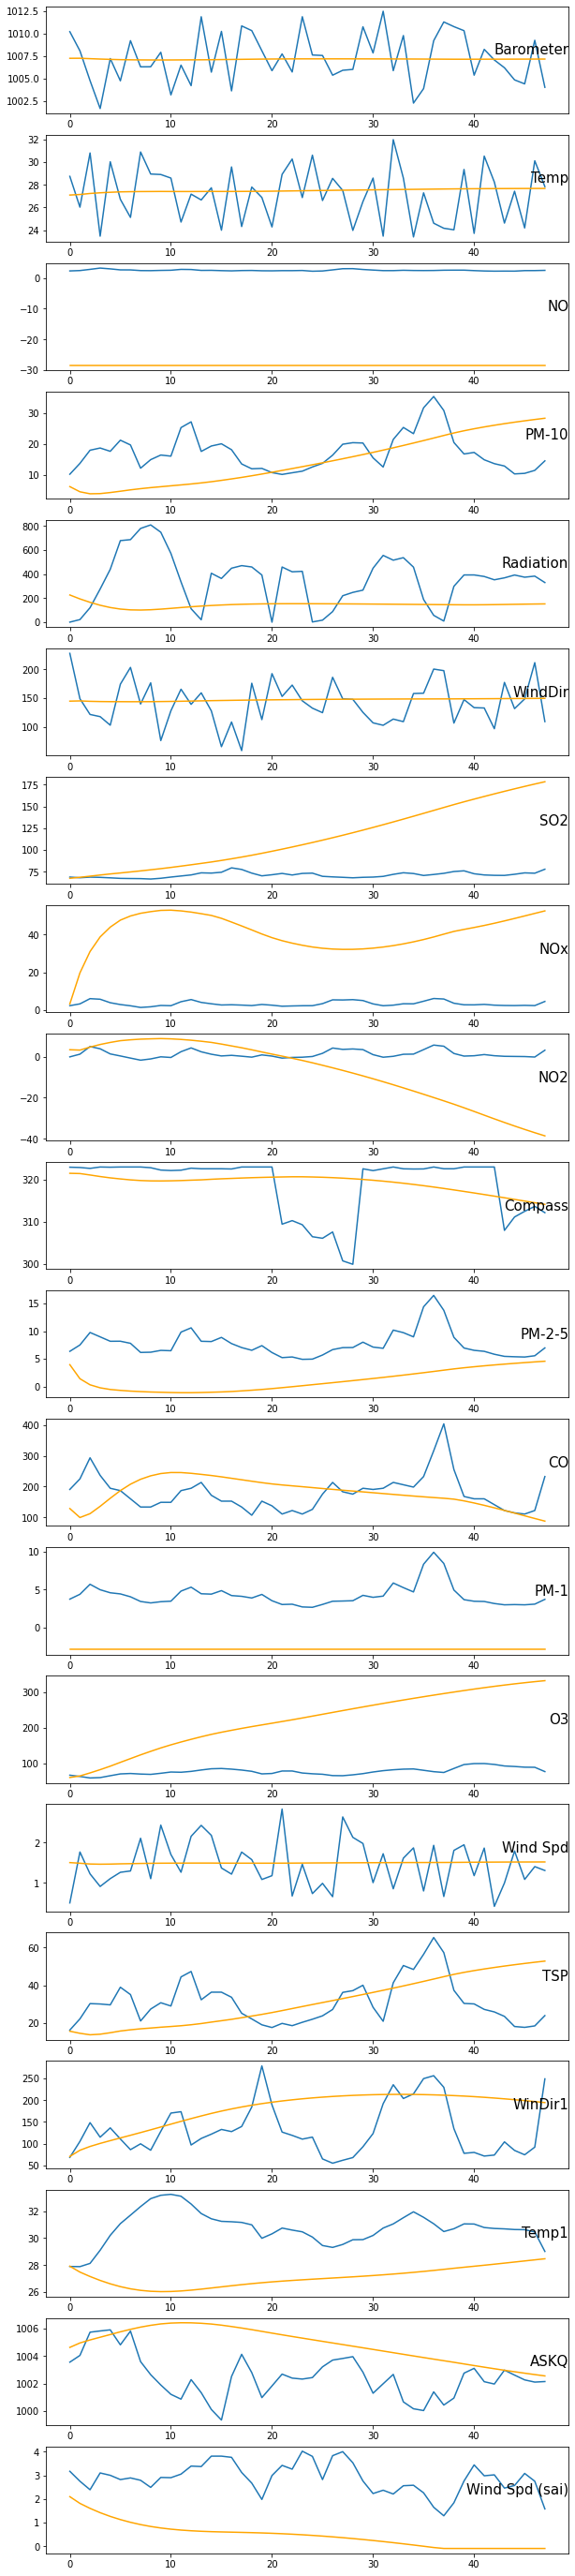

In [23]:
from pandas import read_csv
from matplotlib import pyplot as plt
# load dataset

values = test.values
values1 = true_predictions.values
# specify columns to plot
groups = [0,1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16,17,18,19,20]
i = 1
# plot each column
plt.figure(figsize=(10,50))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.plot(values1[:, group], c = "orange")
    plt.title(test.columns[group], y=0.5, loc='right', fontsize = 15)
    i += 1
plt.show()

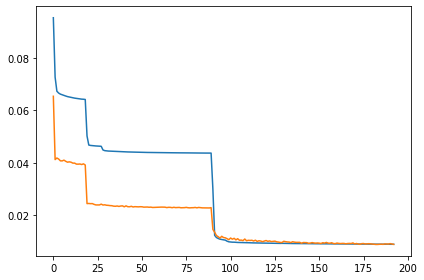

In [24]:
plt.plot(LSTM.history['loss']) 
plt.plot(LSTM.history['val_loss'])
plt.tight_layout() 
plt.show()


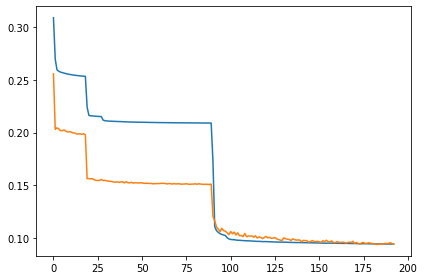

In [25]:
plt.plot(LSTM.history['root_mean_squared_error']) 
plt.plot(LSTM.history['val_root_mean_squared_error'])
plt.tight_layout() 
plt.show()